In [1]:
import numpy as np
import pandas as pd
from objective_anal import fastbarnes_run_1ele

In [3]:
# nwp 오른쪽 끝 열에 _fillvalue 존재 --> sub area만 계산

nwp_file = r"D:\KMK_DATA\NWP\l015_v070_erlo_unis_20kind.2023041000.nc"
var_list = {"UGRD_10maboveground": 0, "VGRD_10maboveground": 1}
stn_info = {"47105": [37.7515, 128.891]}

uv_OA_field = u_OA_field = np.ndarray(shape=(400,400,2), dtype=np.float_)
for i, (key, value) in enumerate(var_list.items()):
    fb_run = fastbarnes_run_1ele(nwp_name=nwp_file, 
                                nwp_var=key, 
                                obs_name="../../fcst_wind/DAIO/obs_data_47105", 
                                obs_dict=stn_info, 
                                obs_var=value,  # 0: u, 1:v
                                run_time=0) # 0: 0900 KST
    # .. input read
    fb_run.read_input()
    # .. sub area
    fb_run.extract_subarea(slat=37., elat=39., slon=127., elon=129.)
    # .. return O.A value
    field, gridX, gridY = fb_run.barnes_run()
    u_OA_field[:,:,i] = field

np.savez( "../DAOU/uv_OA_field_test", value=uv_OA_field, stn_info=stn_info, gridX=gridX, gridY=gridY)


nwp file=  D:\KMK_DATA\NWP\l015_v070_erlo_unis_20kind.2023041000.nc
obs_name=  ../../fcst_wind/DAIO/obs_data_47105
nwp_var=  UGRD_10maboveground
obs_info=  [('47105', [37.7515, 128.891])]
obs_var=  0
run_time=  0
Read nwp file:  D:\KMK_DATA\NWP\l015_v070_erlo_unis_20kind.2023041000.nc
var Min/Max:  -14.243284 9.999e+20
lat shape:  (781, 602)
lon shape:  (781, 602)
32.256875000000015 42.93468114328637
121.83442899999999 132.531874170454
--- nwp read complete
obs shape:  ()
1.3
sub lat:  (147, 117)
sub lon:  (147, 117)
sub nwp:  (147, 117)
36.970163730580865 39.03152178341463
126.97497790415062 129.0779151314157
-6.090452 10.769899
# analysis points:  17200
lat, lon data:  (17200, 2)
value:  (17200,)
126.97497790415062 , 36.970163730580865
129.0779151314157 , 39.03152178341463
-6.090452194213867 10.769899368286133
=== barnes setting
start:  [127.  37.]
lon dist:  2
lat dist:  2
step:  0.005
oa dim:  (400, 400)
end:  129.0 39.0
=== field out
(400, 400)
-6.062169 10.755914
nwp file=  D:\KM

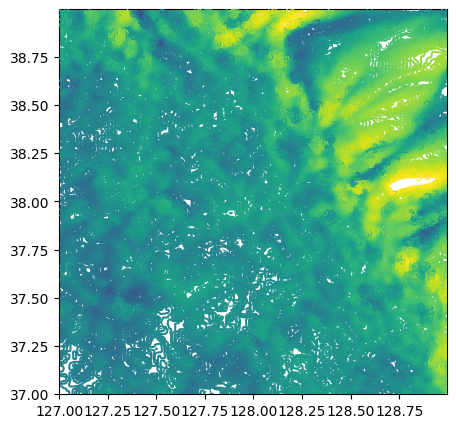

In [15]:
# draw graphic with labeled contours and scattered sample points
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
levels = np.arange(-10, 10, 0.1)
cs = plt.contour(gridX, gridY, u_OA_field[:,:,0], levels)
plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)

#plt.scatter(lon_lat_data[:, 0], lon_lat_data[:, 1], color='red', s=20, marker='.')

plt.show()